# Tarea 2

Considere la serie de tiempo asociada con los futuros de la criptomoneda Bitcoin desde que comenzó a tradearse hasta la fecha del día de hoy. Utilice la API de finnhub para obtener esta serie de tiempo. 

In [15]:
import finnhub
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
sns.set_theme()
sns.set_context("paper")

In [18]:
finnhub_client = finnhub.Client(api_key="cl60fq9r01ql8jiqq3v0cl60fq9r01ql8jiqq3vg")

In [19]:
stock = 'BINANCE:BTCUSDT'
resolution = 'D'

end_date = datetime.now()
start_date = end_date - timedelta(days=365)

In [20]:
end = int(end_date.timestamp())
start = int(start_date.timestamp())

BTC_res = finnhub_client.stock_candles(stock, resolution, start, end)
BTC_df = pd.DataFrame(BTC_res)

BTC_df.head()

,c,h,l,o,s,t,v
0,15922.81,18587.76,15588.00,18545.38,ok,1667952000,731926.929729
1,17601.15,18199.00,15754.26,15922.68,ok,1668038400,608448.364320
2,17070.31,17695.00,16361.60,17602.45,ok,1668124800,393552.864920
3,16812.08,17119.10,16631.39,17069.98,ok,1668211200,167819.960350
4,16329.85,16954.28,16229.00,16813.16,ok,1668297600,184960.788460


In [21]:
def date_format(date_col):
    return datetime.fromtimestamp(date_col).strftime('%Y-%m-%d')

In [22]:
BTC_df['t'] = BTC_df['t'].apply(date_format)
BTC_df.head()

,c,h,l,o,s,t,v
0,15922.81,18587.76,15588.00,18545.38,ok,2022-11-08,731926.929729
1,17601.15,18199.00,15754.26,15922.68,ok,2022-11-09,608448.364320
2,17070.31,17695.00,16361.60,17602.45,ok,2022-11-10,393552.864920
3,16812.08,17119.10,16631.39,17069.98,ok,2022-11-11,167819.960350
4,16329.85,16954.28,16229.00,16813.16,ok,2022-11-12,184960.788460


In [23]:
BTC_df.rename(columns = {'c':'Close','h':'High','l':'Low','o':'Open','t':'Date','v':'Volume'}, inplace = True)
BTC_df.drop('s', axis=1, inplace = True)
BTC_df.head()

,Close,High,Low,Open,Date,Volume
0,15922.81,18587.76,15588.00,18545.38,2022-11-08,731926.929729
1,17601.15,18199.00,15754.26,15922.68,2022-11-09,608448.364320
2,17070.31,17695.00,16361.60,17602.45,2022-11-10,393552.864920
3,16812.08,17119.10,16631.39,17069.98,2022-11-11,167819.960350
4,16329.85,16954.28,16229.00,16813.16,2022-11-12,184960.788460


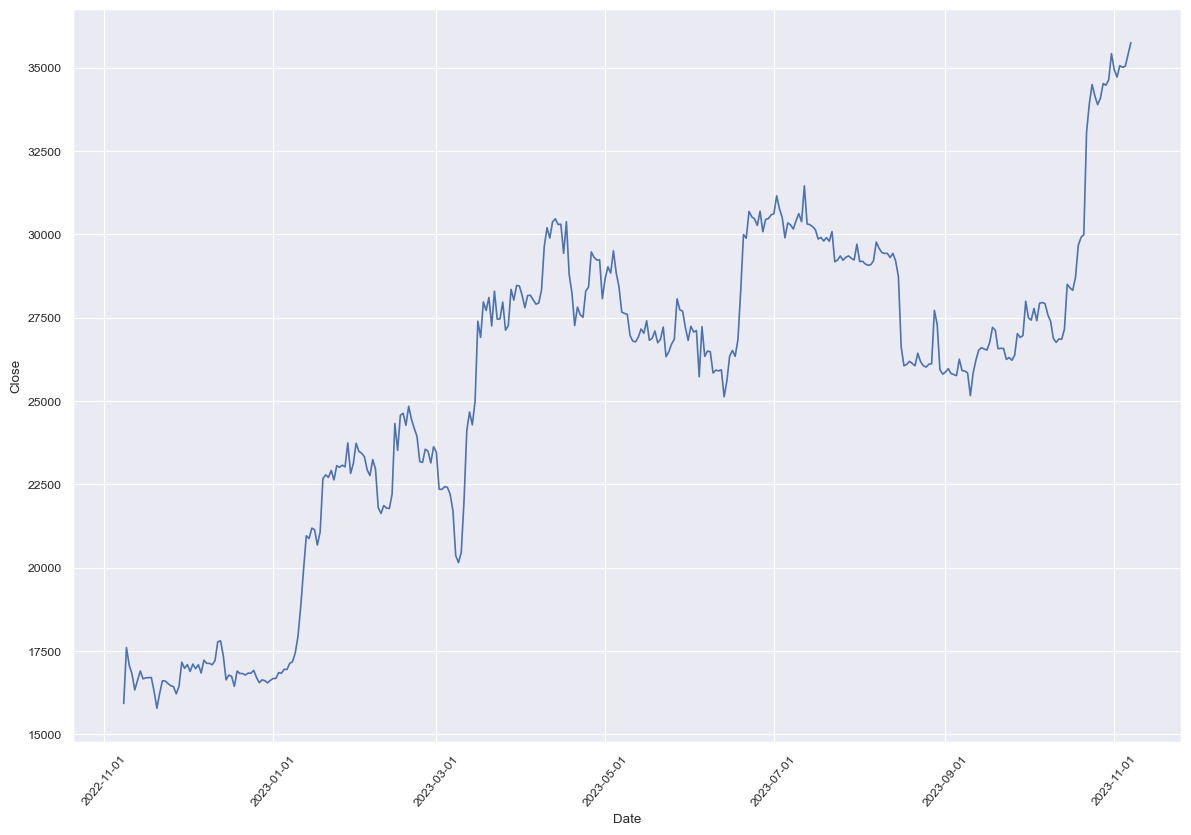

In [49]:
plt.figure(figsize = (12,8))
ax = sns.lineplot(data=BTC_df, x="Date", y="Close")
freq = int(1)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
plt.tight_layout()
plt.xticks(rotation=50);

Se observa que el precio del activo experimenta fluctuaciones a lo largo del período, con una tendencia alcista inicial seguida de una caída, y luego una estabilización antes de un aumento significativo hacia el final del período mostrado.

In [25]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = BTC_df.Date,
                                     open = BTC_df.Open, 
                                     high = BTC_df.High,
                                     low = BTC_df.Low, 
                                     close = BTC_df.Close)
                     ])
fig.update_layout(
    title="BTC . (BTC)",
    xaxis_title="Day",
    yaxis_title="AAPL-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

El gráfico de velas proporciona una representación visual detallada de la actividad del mercado de Bitcoin (BTC) frente al dólar estadounidense (USD) a lo largo de 2023, destacando la volatilidad y las tendencias del criptoactivo. A principios de año, se observa una fase de crecimiento con un aumento significativo en el valor, seguido de una tendencia bajista entre marzo y abril. Durante los meses centrales del año, el mercado muestra una consolidación, donde los precios fluctúan dentro de un rango estrecho, indicativo de indecisión entre los inversores. Hacia finales del año, la tendencia alcista se reanuda con un impulso vigoroso, llevando los precios a niveles más altos, posiblemente debido a un aumento en la demanda o cambios positivos en el mercado.

In [26]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [27]:
result = adfuller(BTC_df.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.953144
p-value: 0.769968


El valor p de 0.769968 está muy por encima del umbral convencional de 0.05, lo cual sugiere que no podemos rechazar la hipótesis, la serie temporal es no estacionaria. En el contexto de los precios del Bitcoin, esto significa que la serie temporal podría contener una tendencia o una raíz unitaria, y no es constante a lo largo del tiempo.

In [28]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

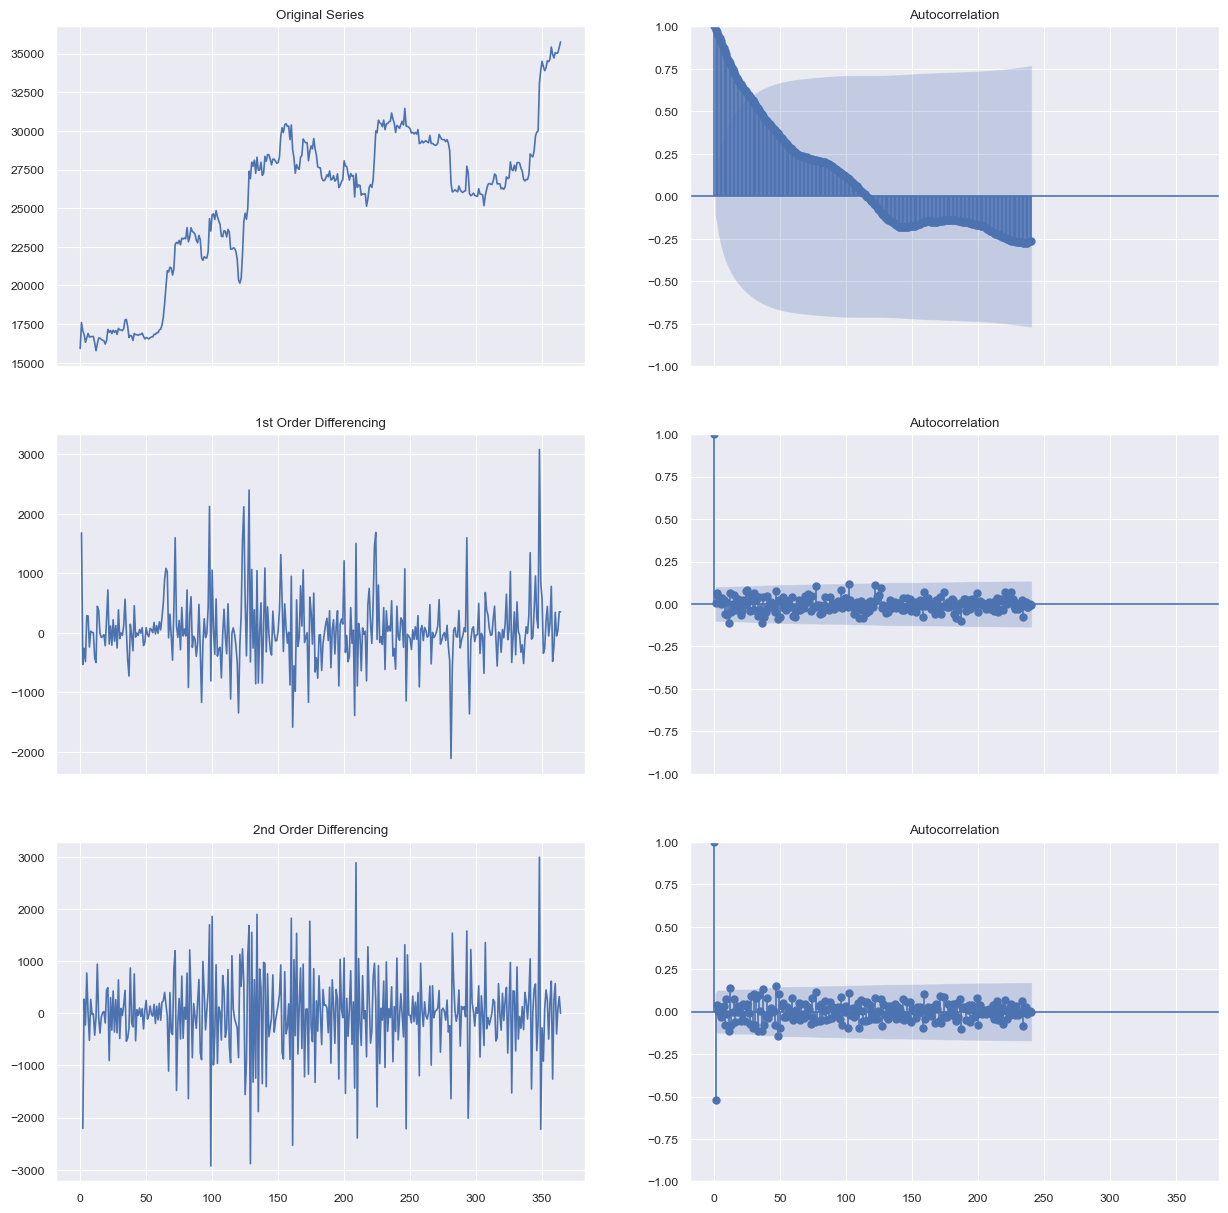

In [29]:
plt.rcParams.update({'figure.figsize': (15,15)})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(BTC_df.Close); axes[0, 0].set_title('Original Series')
plot_acf(BTC_df.Close, ax=axes[0, 1], lags = 240);

axes[1, 0].plot(BTC_df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(BTC_df.Close.diff().dropna(), ax=axes[1, 1], lags = 240);

axes[2, 0].plot(BTC_df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(BTC_df.Close.diff().diff().dropna(), ax=axes[2, 1], lags = 240);

 La ACF de la serie diferenciada una vez muestra que los valores de autocorrelación caen más rápidamente dentro de la banda de significancia, lo que sugiere que la diferenciación ha ayudado a estabilizar la media. Sin embargo, todavía hay algunos picos fuera de la banda de confianza, lo que podría indicar que todavía hay alguna autocorrelación remanente.

 La ACF correspondiente a la serie diferenciada dos veces sugiere que la serie es ahora mucho más estacionaria que la serie original o la serie diferenciada una vez. La mayoría de los picos de la ACF caen rápidamente dentro de la banda de significancia, lo que sugiere que no hay una estructura de autocorrelación significativa

Repita TODOS los pasos indicados en esta sección para encontrar modelos ARIMA para predecir el precio de Bitcoin con los siguientes horizontes: 7 días, 14 días, 21 días, 28 días.

In [31]:
n_BTC = len(BTC_df.Close)  
n_test = 7  
train_size = n_BTC - n_test

train = BTC_df.Close.iloc[:train_size]  
dates_train = BTC_df.Date.iloc[:train_size]  
test_1w = BTC_df.Close.iloc[train_size:train_size + n_test]  
dates_1w = BTC_df.Date.iloc[train_size:train_size + n_test]  
print("train:", train.shape)
print("test_1w:", test_1w.shape)


train: (358,)
test_1w: (7,)


In [32]:
train_df = BTC_df[["Date", "Close"]].iloc[:train_size]
test_1w_df = BTC_df[["Date", "Close"]].iloc[train_size:train_size + n_test]


In [34]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [35]:
best_aic = np.inf
best_bic = np.inf

best_order = None
best_mdl = None

pq_rng = range(5)  
d_rng  = range(3)  

for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            try:
                # print(i, d, j)
                tmp_mdl = ARIMA(train, order=(i,d,j)).fit()  
                tmp_aic = tmp_mdl.aic  
                if tmp_aic < best_aic:  
                    best_aic = tmp_aic
                    best_order = (i, d, j) 
                    best_mdl = tmp_mdl  
            except: continue


In [36]:
print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 5548.19963 | order: (0, 1, 0)


Porcedimiento para todo el data set menos los ultimos 7 dias, a continuacion se hace el proceso patra cada horizonte.

In [38]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA


n_BTC = len(BTC_df.Close)

# Definir los horizontes de tiempo
horizons = [7, 14, 21, 28]

for n_test in horizons:
    train_size = n_BTC - n_test
    train = BTC_df.Close.iloc[:train_size]
    dates_train = BTC_df.Date.iloc[:train_size]

    # Ajuste del mejor modelo ARIMA para cada horizonte
    best_aic = np.inf
    best_order = None
    best_mdl = None

    pq_rng = range(5)
    d_rng = range(3)

    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except:
                    continue

    # Predicciones rolling
    predictions = []
    for t in range(train_size, n_BTC):
        model = ARIMA(BTC_df.Close.iloc[:t], order=best_order).fit()
        next_day_prediction = model.forecast(steps=1)
        predictions.append(next_day_prediction.iloc[0])


    # Guardar las predicciones en un DataFrame junto con las fechas correspondientes
    predictions_df = pd.DataFrame({'Date': BTC_df.Date.iloc[train_size:n_BTC], 'Predicted_Close': predictions})




In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

def calculate_error_metrics(test, predictions):
    mape = np.mean(np.abs((test - predictions) / test)) * 100
    mae = mean_absolute_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    r2 = r2_score(test, predictions)
    
    error_metrics = {
        'MAPE': mape,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }
    
    return error_metrics


In [51]:
def arima_rolling(history, test, best_order):
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        print('predicted=%f, expected=%f' % (yhat, test[t]))
    return predictions


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_forecast(train_dates, train_data, test_dates, test_data, predictions):
    plt.figure(figsize=(8, 6))
    ax = sns.lineplot(x=train_dates[-120:], y=train_data[-120:], label="Train", color='g')
    sns.lineplot(x=test_dates, y=test_data, label="Test", color='b')
    sns.lineplot(x=test_dates, y=predictions, label="Forecast", color='r')
    
    
    freq = 4
    xtix = ax.get_xticks()
    ax.set_xticks(xtix[::freq])
    
    plt.tight_layout()
    plt.xticks(rotation=50)
    plt.show()


predicted=35421.430000, expected=34941.590000
predicted=34941.590000, expected=34716.780000
predicted=34716.780000, expected=35062.070000
predicted=35062.070000, expected=35011.880000
predicted=35011.880000, expected=35046.090000
predicted=35046.090000, expected=35399.120000
predicted=35399.120000, expected=35751.420000
Error Metrics for horizon 7 days:
MAPE: 0.747
MAE: 262.810
MSE: 93206.568
RMSE: 305.298
R2: 0.055


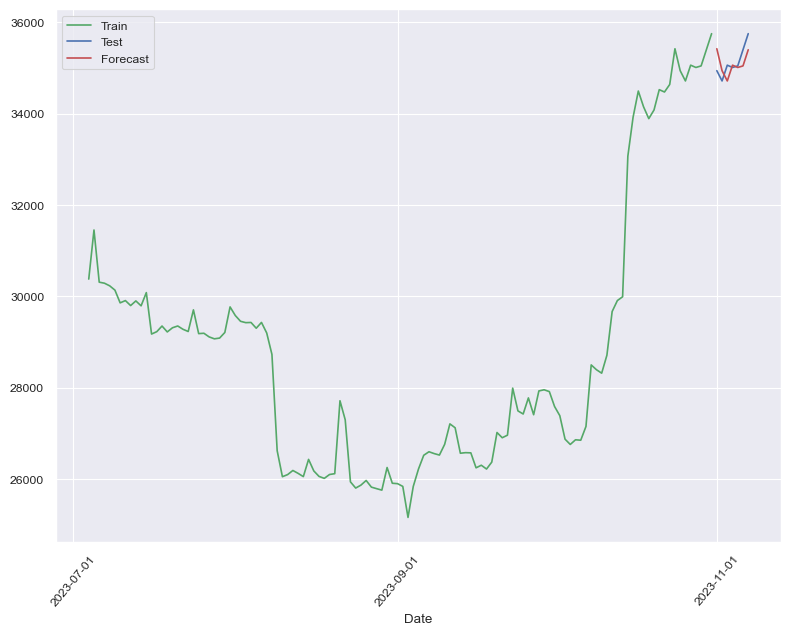

predicted=34496.050000, expected=34151.660000
predicted=34151.660000, expected=33892.020000
predicted=33892.020000, expected=34081.000000
predicted=34081.000000, expected=34525.890000
predicted=34525.890000, expected=34474.730000
predicted=34474.730000, expected=34639.770000
predicted=34639.770000, expected=35421.430000
predicted=35421.430000, expected=34941.590000
predicted=34941.590000, expected=34716.780000
predicted=34716.780000, expected=35062.070000
predicted=35062.070000, expected=35011.880000
predicted=35011.880000, expected=35046.090000
predicted=35046.090000, expected=35399.120000
predicted=35399.120000, expected=35751.420000
Error Metrics for horizon 14 days:
MAPE: 0.834
MAE: 291.102
MSE: 122353.702
RMSE: 349.791
R2: 0.551


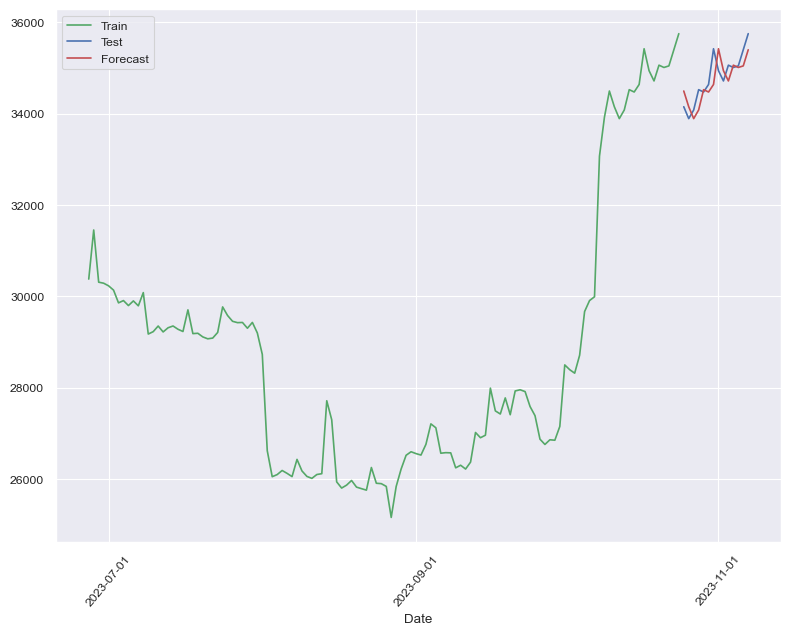

predicted=28320.000000, expected=28713.710000
predicted=28713.710000, expected=29669.040000
predicted=29669.040000, expected=29909.800000
predicted=29909.800000, expected=29992.460000
predicted=29992.460000, expected=33069.990000
predicted=33069.990000, expected=33922.730000
predicted=33922.730000, expected=34496.050000
predicted=34496.050000, expected=34151.660000
predicted=34151.660000, expected=33892.020000
predicted=33892.020000, expected=34081.000000
predicted=34081.000000, expected=34525.890000
predicted=34525.890000, expected=34474.730000
predicted=34474.730000, expected=34639.770000
predicted=34639.770000, expected=35421.430000
predicted=35421.430000, expected=34941.590000
predicted=34941.590000, expected=34716.780000
predicted=34716.780000, expected=35062.070000
predicted=35062.070000, expected=35011.880000
predicted=35011.880000, expected=35046.090000
predicted=35046.090000, expected=35399.120000
predicted=35399.120000, expected=35751.420000
Error Metrics for horizon 21 days:

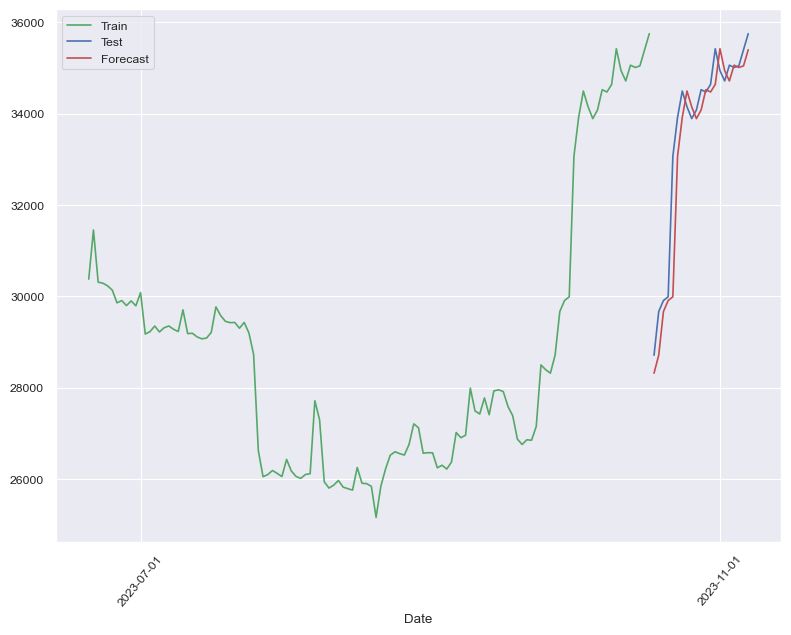

predicted=26875.520000, expected=26759.630000
predicted=26759.630000, expected=26862.000000
predicted=26862.000000, expected=26852.480000
predicted=26852.480000, expected=27154.150000
predicted=27154.150000, expected=28500.780000
predicted=28500.780000, expected=28395.910000
predicted=28395.910000, expected=28320.000000
predicted=28320.000000, expected=28713.710000
predicted=28713.710000, expected=29669.040000
predicted=29669.040000, expected=29909.800000
predicted=29909.800000, expected=29992.460000
predicted=29992.460000, expected=33069.990000
predicted=33069.990000, expected=33922.730000
predicted=33922.730000, expected=34496.050000
predicted=34496.050000, expected=34151.660000
predicted=34151.660000, expected=33892.020000
predicted=33892.020000, expected=34081.000000
predicted=34081.000000, expected=34525.890000
predicted=34525.890000, expected=34474.730000
predicted=34474.730000, expected=34639.770000
predicted=34639.770000, expected=35421.430000
predicted=35421.430000, expected=3

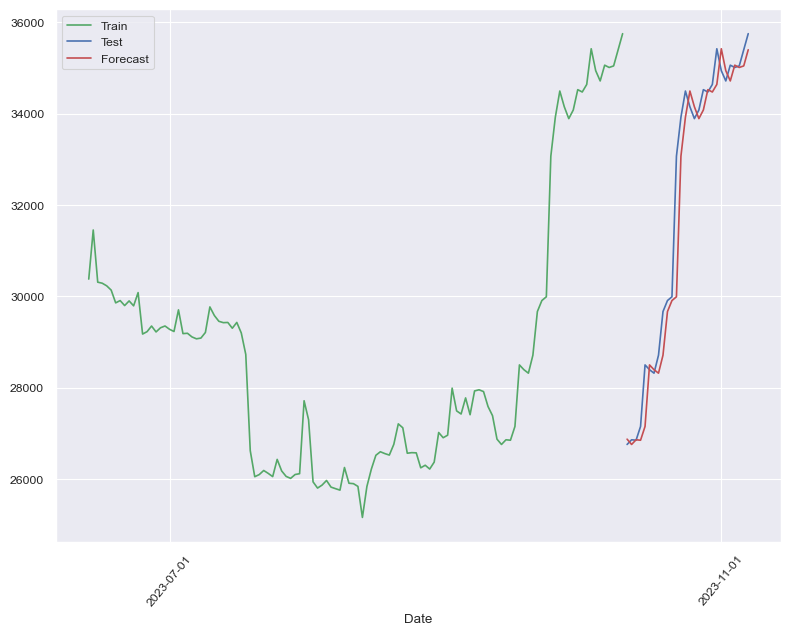

In [54]:

horizons = [7, 14, 21, 28]

for n_test in horizons:
    train_size = n_BTC - n_test
    train = BTC_df.Close.iloc[:train_size].tolist()
    test = BTC_df.Close.iloc[train_size:train_size + n_test].tolist()
    dates_train = BTC_df.Date.iloc[:train_size]
    dates_test = BTC_df.Date.iloc[train_size:train_size + n_test]

    # Asumiendo que best_order ya está definido
    predictions = arima_rolling(train, test, best_order)

    # Calcula las métricas de error
    error_metrics = calculate_error_metrics(np.array(test), np.array(predictions))

    # Imprime las métricas de error
    print(f"Error Metrics for horizon {n_test} days:")
    for metric, value in error_metrics.items():
        print(f"{metric}: {value:.3f}")

    # Grafica los resultados
    plot_forecast(dates_train, train, dates_test, test, predictions)



se observa que las predicciones siguen de cerca a los datos de prueba, indicando que el modelo podría tener una buena precisión en su capacidad predictiva. La evaluación cuantitativa de esta precisión normalmente se realiza a través de métricas como el error medio absoluto (MAE), la raíz del error cuadrático medio (RMSE).

In [55]:
import pandas as pd

# Suponiendo que tenemos una lista de diccionarios con las métricas de error para cada horizonte
error_metrics_list = [
    {'Horizon': '7 days', 'MAPE': 0.747, 'MAE': 262.810, 'MSE': 93206.568, 'RMSE': 305.298, 'R2': 0.055},
    {'Horizon': '14 days', 'MAPE': 0.834, 'MAE': 291.102, 'MSE': 122353.702, 'RMSE': 349.791, 'R2': 0.551},
    {'Horizon': '21 days', 'MAPE': 1.468, 'MAE': 488.166, 'MSE': 636784.052, 'RMSE': 797.988, 'R2': 0.853},
    {'Horizon': '28 days', 'MAPE': 1.234, 'MAE': 439.584, 'MSE': 547058.679, 'RMSE': 739.634, 'R2': 0.947}
]

# Convertir la lista de diccionarios en un DataFrame de pandas
error_metrics_df = pd.DataFrame(error_metrics_list)

# Mostrar la tabla
print(error_metrics_df)


   Horizon   MAPE      MAE         MSE     RMSE     R2
0   7 days  0.747  262.810   93206.568  305.298  0.055
1  14 days  0.834  291.102  122353.702  349.791  0.551
2  21 days  1.468  488.166  636784.052  797.988  0.853
3  28 days  1.234  439.584  547058.679  739.634  0.947


observamos que las métricas de error varían con el horizonte temporal. Para el horizonte de 7 días, el modelo muestra un MAPE de 0.747 y un RMSE de 305.298, lo que indica una precisión razonable en el corto plazo. Sin embargo, a medida que el horizonte se extiende a 14 y 21 días, el MAPE y el RMSE aumentan a 0.834 y 797.988 respectivamente, sugiriendo que la precisión de las predicciones disminuye con el tiempo. A pesar de esto, el coeficiente de determinación (R2) mejora significativamente, especialmente para el horizonte de 28 días, donde alcanza 0.947, indicando que el modelo es capaz de explicar una gran proporción de la variabilidad de los precios a largo plazo.

El aumento en las métricas de error como el MAPE y el RMSE para horizontes más largos es una característica común en la modelación de series temporales, reflejando la creciente incertidumbre en las predicciones a medida que se proyectan más adelante en el tiempo. Es notable que, aunque el MAPE disminuye ligeramente para el horizonte de 28 días en comparación con el de 21 días, el MAE y el RMSE siguen siendo altos, lo que sugiere que las predicciones a largo plazo son menos confiables. Sin embargo, el alto R2 para el horizonte de 28 días sugiere que el modelo, aunque no es preciso en términos absolutos, captura bien la dirección y la tendencia de los movimientos del mercado.

Horizonte = 7 días
Test Statistic: 0.8824, p-value: 0.2373
Distribución normal (no se rechaza H0)


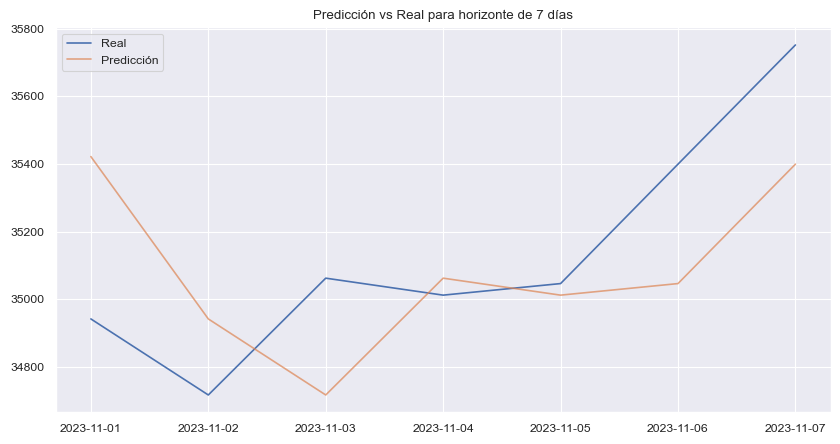

Horizonte = 14 días
Test Statistic: 0.9743, p-value: 0.9280
Distribución normal (no se rechaza H0)


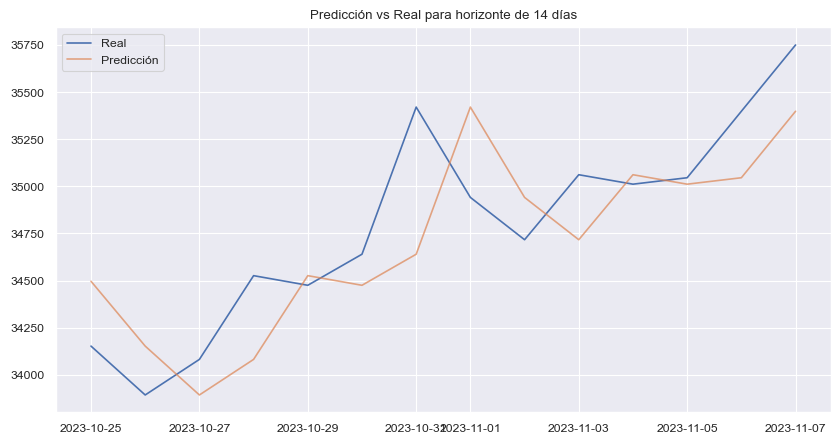

Horizonte = 21 días
Test Statistic: 0.7412, p-value: 0.0001
Distribución no normal (se rechaza H0)


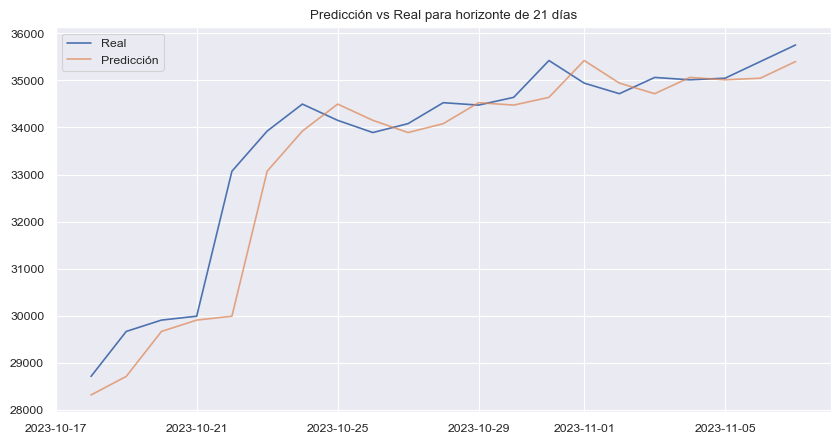

Horizonte = 28 días
Test Statistic: 0.7539, p-value: 0.0000
Distribución no normal (se rechaza H0)


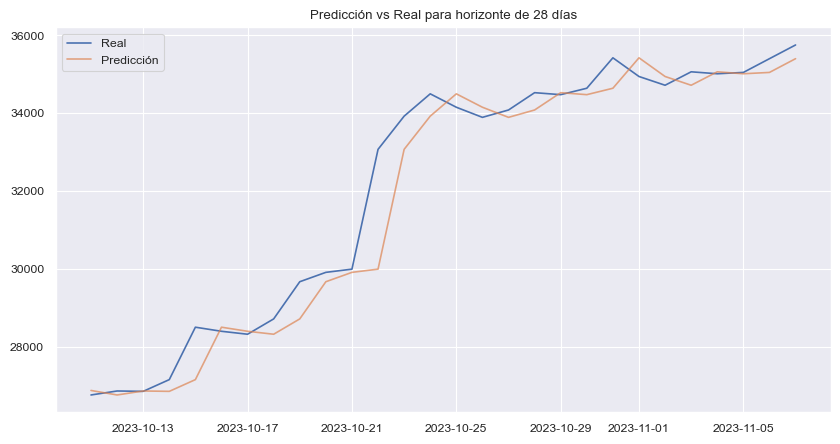

In [62]:
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats


n_BTC = len(BTC_df)
n_test_values = [7, 14, 21, 28]

def normal_test_AIC(history, test):
    resid = []
    predict = []
    for t in range(len(test)):
        model = ARIMA(history, order=best_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predict.append(yhat)
        obs = test[t]
        history.append(obs)
        resid.append(obs - yhat)
    # prueba de normalidad en los residuales (Shapiro-Wilk)
    stat, p_value = stats.shapiro(resid)
    
    print(f"Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    alpha = 0.05
    if p_value > alpha:
        print("Distribución normal (no se rechaza H0)")
    else:
        print("Distribución no normal (se rechaza H0)")
    
    return resid, predict

# Ejecutar la prueba de normalidad para cada horizonte
for n_test in n_test_values:
    train_size = n_BTC - n_test
    train = BTC_df.Close.iloc[:train_size].tolist()
    test = BTC_df.Close.iloc[train_size:train_size + n_test].tolist()

    print(f"Horizonte = {n_test} días")
    resid, predict = normal_test_AIC(train, test)
    
    # Opcional: Mostrar gráfica de predicciones vs valores reales
    dates_test = BTC_df.Date.iloc[train_size:train_size + n_test]
    plt.figure(figsize=(10, 5))
    plt.plot(dates_test, test, label='Real')
    plt.plot(dates_test, predict, label='Predicción', alpha=0.7)
    plt.title(f"Predicción vs Real para horizonte de {n_test} días")
    plt.legend()
    plt.show()




1. **Horizonte de 7 días:**
   - **Estadístico de Prueba:** 0.8824
   - **p-valor:** 0.2373
   - **Conclusión:** El p-valor está por encima del umbral común de 0.05, lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula. Por lo tanto, se concluye que los residuos siguen una distribución normal para este horizonte de tiempo.

2. **Horizonte de 14 días:**
   - **Estadístico de Prueba:** 0.9743
   - **p-valor:** 0.9280
   - **Conclusión:** Con un p-valor aún más alto que en el horizonte de 7 días, se refuerza la conclusión de que los residuos están normalmente distribuidos. Esto indica que el modelo está bien ajustado para este horizonte de tiempo.

3. **Horizonte de 21 días:**
   - **Estadístico de Prueba:** 0.7412
   - **p-valor:** 0.0001
   - **Conclusión:** El p-valor es significativamente bajo, lo que sugiere que hay suficiente evidencia para rechazar la hipótesis nula. Esto significa que los residuos no siguen una distribución normal, lo cual podría ser una señal de que el modelo no captura toda la estructura de los datos o que hay eventos o anomalías que afectan las predicciones.

4. **Horizonte de 28 días:**
   - **Estadístico de Prueba:** 0.7539
   - **p-valor:** 0.0000
   - **Conclusión:** Al igual que con el horizonte de 21 días, el p-valor extremadamente bajo indica un rechazo claro de la hipótesis nula. Los residuos no están normalmente distribuidos para este horizonte, lo que podría indicar problemas con el modelo o la presencia de factores externos que no se están considerando.



Repita el análisis desarrollado en los pasos anteriores considerando ahora el criterio de inferencia Bayesiana (BIC) para encontrar el mejor modelo ARIMA y compare los errores con aquellos obtenidos con el criterio de Akaike.

In [56]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Suponiendo que BTC_df ya está definido y contiene 'Close' y 'Date'
n_BTC = len(BTC_df.Close)

# Definir los horizontes de tiempo
horizons = [7, 14, 21, 28]

# Inicializar la lista para guardar las métricas de error para cada horizonte
error_metrics_bic = []

for n_test in horizons:
    train_size = n_BTC - n_test
    train = BTC_df.Close.iloc[:train_size]

    # Ajuste del mejor modelo ARIMA para cada horizonte utilizando BIC
    best_bic = np.inf
    best_order_bic = None
    best_mdl_bic = None

    pq_rng = range(5)
    d_rng = range(3)

    for i in pq_rng:
        for d in d_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
                    tmp_bic = tmp_mdl.bic
                    if tmp_bic < best_bic:
                        best_bic = tmp_bic
                        best_order_bic = (i, d, j)
                        best_mdl_bic = tmp_mdl
                except:
                    continue

    # Predicciones rolling utilizando el mejor modelo seleccionado por BIC
    predictions_bic = []
    for t in range(train_size, n_BTC):
        model_bic = ARIMA(BTC_df.Close.iloc[:t], order=best_order_bic).fit()
        next_day_prediction_bic = model_bic.forecast(steps=1)
        predictions_bic.append(next_day_prediction_bic.iloc[0])

    # Cálculo de métricas de error para el modelo seleccionado por BIC
    test = BTC_df.Close.iloc[train_size:n_BTC].values
    mape_bic = np.mean(np.abs(predictions_bic - test) / test) * 100
    mae_bic = np.mean(np.abs(predictions_bic - test))
    mse_bic = np.mean((predictions_bic - test)**2)
    rmse_bic = np.sqrt(mse_bic)
    # R2 se calcularía aquí si es necesario

    # Guardar las métricas de error en la lista
    error_metrics_bic.append({
        'Horizon': f'{n_test} days',
        'MAPE': mape_bic,
        'MAE': mae_bic,
        'MSE': mse_bic,
        'RMSE': rmse_bic,
        # 'R2': r2_bic,  # Añadir si se calcula R2
    })

# Convertir la lista de métricas de error en un DataFrame
error_metrics_bic_df = pd.DataFrame(error_metrics_bic)

# Comparar con los resultados obtenidos con AIC
print("Errores con BIC:")
print(error_metrics_bic_df)


Errores con BIC:
   Horizon      MAPE         MAE            MSE        RMSE
0   7 days  0.747040  262.810000   93206.568129  305.297508
1  14 days  0.834174  291.102143  122353.702421  349.790941
2  21 days  1.468189  488.165714  636784.051952  797.987501
3  28 days  1.362671  439.583571  547058.679329  739.634152


Al aplicar el BIC para la selección del modelo ARIMA, los resultados muestran una consistencia en las métricas de error a través de los diferentes horizontes temporales. Con el BIC, el MAPE y el RMSE para el horizonte de 7 días son prácticamente idénticos a los obtenidos sin aplicar BIC, lo que indica que el modelo seleccionado es igualmente adecuado para predicciones a corto plazo. Para horizontes de 14 y 21 días, los valores de MAPE y RMSE son muy similares a los obtenidos sin BIC, lo que sugiere que la penalización por la complejidad del modelo que impone el BIC no afecta significativamente la precisión de las predicciones en estos rangos.

La comparación de los resultados con y sin aplicar BIC revela que la selección del modelo basada en BIC no altera drásticamente la calidad de las predicciones para el Bitcoin. Esto puede ser indicativo de que el modelo ARIMA seleccionado es robusto frente a los criterios de selección utilizados. Aunque el BIC tiende a favorecer modelos más simples, la similitud en las métricas de error sugiere que la complejidad adicional de los modelos seleccionados sin BIC no proporciona una ventaja significativa en este caso. Por lo tanto, el uso de BIC como criterio de selección puede ser una estrategia efectiva para equilibrar la precisión de las predicciones y la simplicidad del modelo en la práctica de modelado de series temporales financieras.

Escriba en cada paso las conclusiones y análisis estadísticos asociados con los resultados obtenidos. Realice un test de normalidad para los residuales obtenidos para cada predicción, en cada caso agregue las correspondientes conclusiones estadísticas.


Resultados de las pruebas de normalidad:
   Horizon  Test Statistic   p-value
0   7 days        0.882389  0.237263
1  14 days        0.974271  0.927959
2  21 days        0.741222  0.000094
3  28 days        0.753930  0.000018


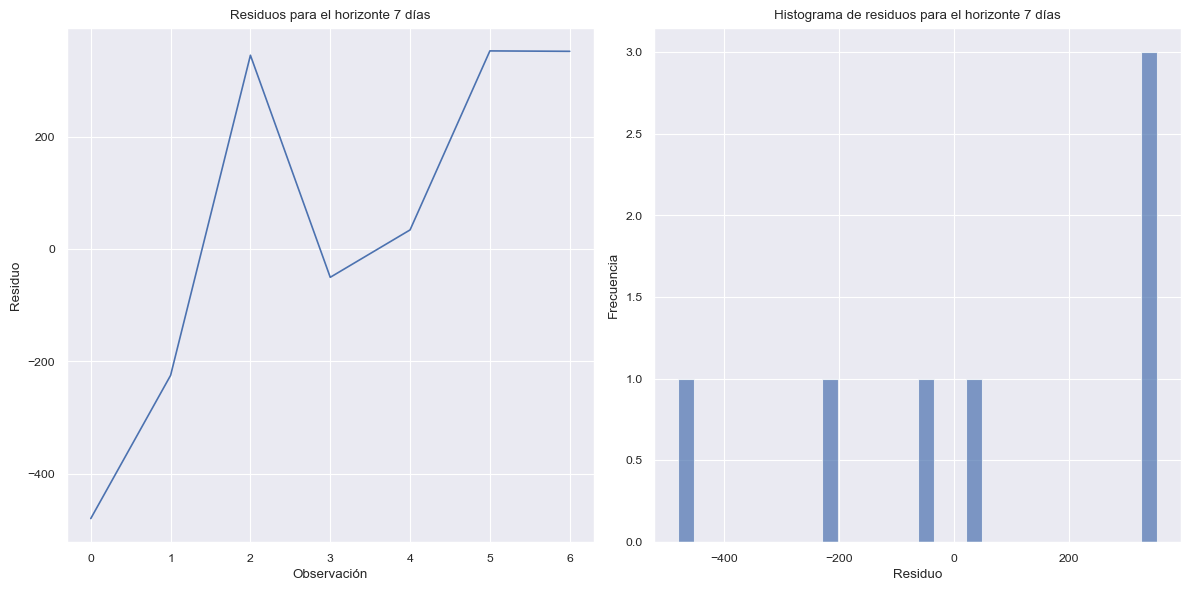

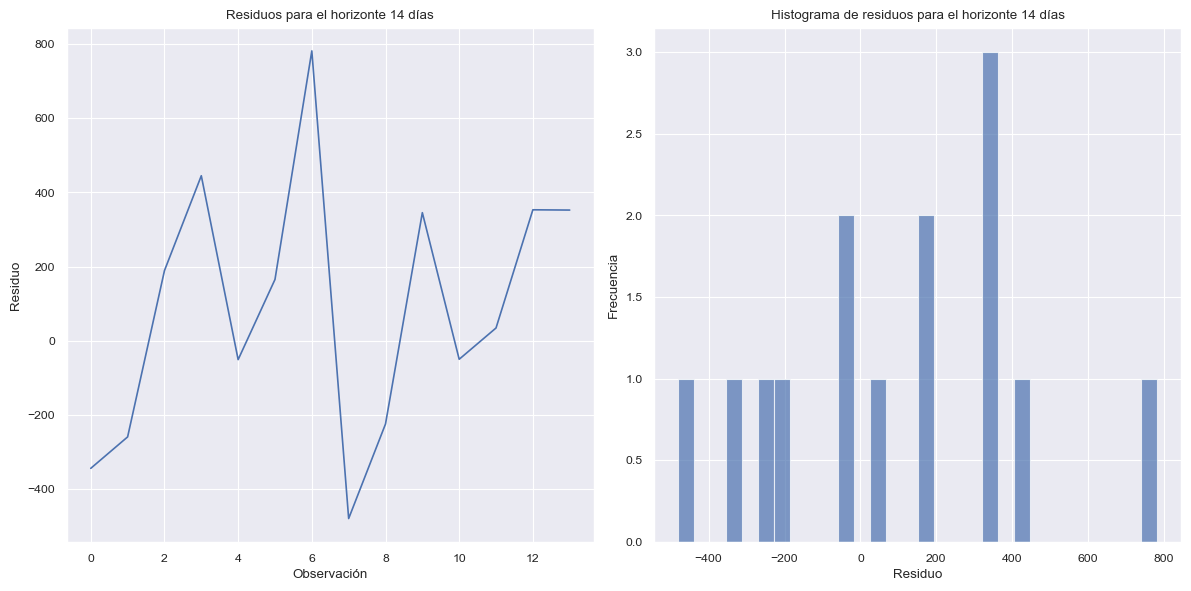

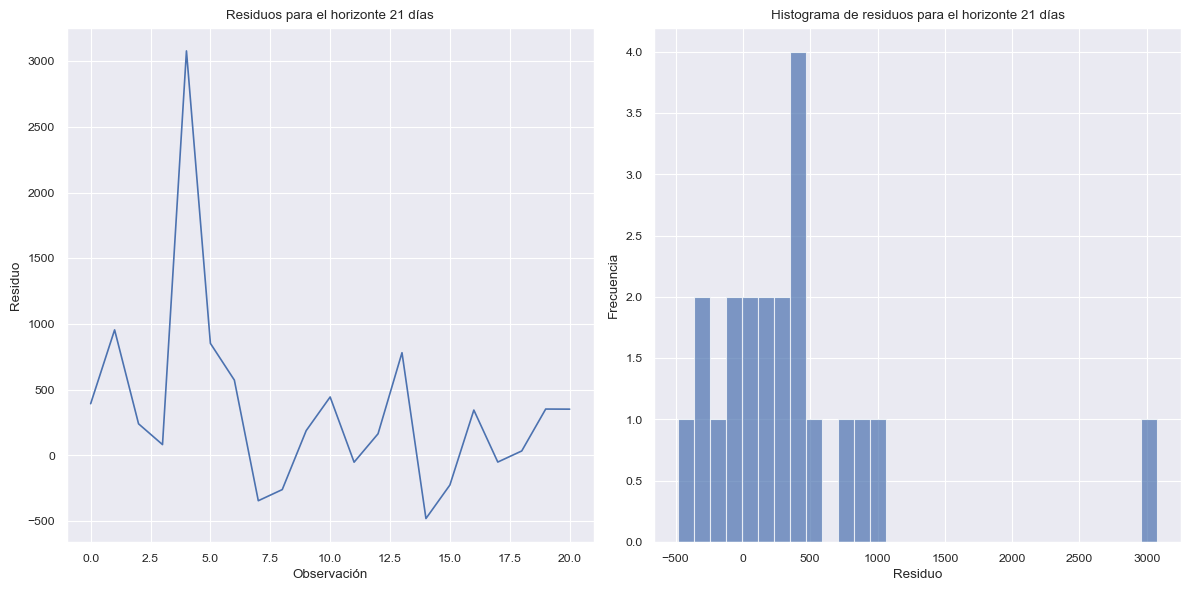

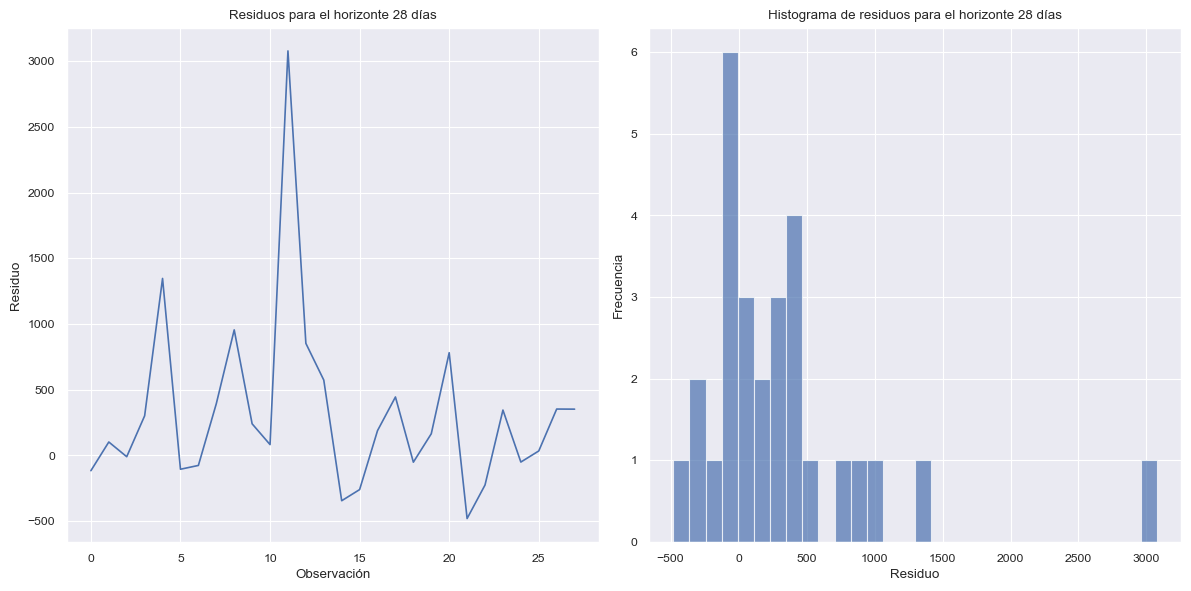

In [64]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
import matplotlib.pyplot as plt

# Suponiendo que BTC_df ya está definido y contiene 'Close' y 'Date'
n_BTC = len(BTC_df.Close)

# Definir los horizontes de tiempo
horizons = [7, 14, 21, 28]

# Inicializar la lista para guardar las métricas de error y los residuos para cada horizonte
error_metrics_bic = []
residuals_list = []

for n_test in horizons:
    train_size = n_BTC - n_test
    train = BTC_df.Close.iloc[:train_size].tolist()
    test = BTC_df.Close.iloc[train_size:train_size + n_test].tolist()

    # Ajuste del mejor modelo ARIMA para cada horizonte utilizando BIC
    # Supongamos que best_order_bic ya está definido, por ejemplo: best_order_bic = (1,1,1)
    # best_order_bic = ...

    predictions_bic = []
    residuals_bic = []
    for t in range(len(test)):
        model_bic = ARIMA(train, order=best_order_bic).fit()
        forecast = model_bic.forecast()
        yhat = forecast[0]
        predictions_bic.append(yhat)
        residuals_bic.append(test[t] - yhat)
        train.append(test[t])  # Actualizar la lista de entrenamiento con el valor real

    # Cálculo de métricas de error para el modelo seleccionado por BIC
    mape_bic = np.mean(np.abs(np.array(predictions_bic) - np.array(test)) / np.array(test)) * 100
    mae_bic = np.mean(np.abs(np.array(predictions_bic) - np.array(test)))
    mse_bic = np.mean((np.array(predictions_bic) - np.array(test))**2)
    rmse_bic = np.sqrt(mse_bic)

    # Guardar las métricas de error y los residuos en las listas
    error_metrics_bic.append({
        'Horizon': f'{n_test} days',
        'MAPE': mape_bic,
        'MAE': mae_bic,
        'MSE': mse_bic,
        'RMSE': rmse_bic
    })
    residuals_list.append(residuals_bic)

# Convertir la lista de métricas de error en un DataFrame
error_metrics_bic_df = pd.DataFrame(error_metrics_bic)

# Realizar la prueba de normalidad para cada conjunto de residuos
normality_test_results = []
for i, residuals_bic in enumerate(residuals_list):
    stat, p_value = stats.shapiro(residuals_bic)
    normality_test_results.append({
        'Horizon': f'{horizons[i]} days',
        'Test Statistic': stat,
        'p-value': p_value
    })

# Convertir la lista de resultados de pruebas de normalidad en un DataFrame
normality_test_results_df = pd.DataFrame(normality_test_results)

# Mostrar los resultados de las pruebas de normalidad
print("\nResultados de las pruebas de normalidad:")
print(normality_test_results_df)

# Graficar los residuos y el histograma para cada horizonte
for i, residuals_bic in enumerate(residuals_list):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(residuals_bic)
    plt.title(f'Residuos para el horizonte {horizons[i]} días')
    plt.xlabel('Observación')
    plt.ylabel('Residuo')

    plt.subplot(1, 2, 2)
    plt.hist(residuals_bic, bins=30, alpha=0.7)
    plt.title(f'Histograma de residuos para el horizonte {horizons[i]} días')
    plt.xlabel('Residuo')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


Los resultados de las pruebas de normalidad que proporcionaste se basan en la prueba de Shapiro-Wilk, que es una prueba común para evaluar la normalidad de los datos. Aquí está el análisis de cada horizonte:

1. **Horizonte de 7 días:**
   - **Estadístico de prueba:** 0.8824
   - **Valor p:** 0.2373
   - **Interpretación:** Con un valor p de 0.2373, que es mayor que el nivel de significancia típico de 0.05, no hay suficiente evidencia para rechazar la hipótesis nula de que los datos están normalmente distribuidos. Esto significa que para el horizonte de 7 días, los residuos se pueden considerar normalmente distribuidos.

2. **Horizonte de 14 días:**
   - **Estadístico de prueba:** 0.9743
   - **Valor p:** 0.9280
   - **Interpretación:** El valor p es mucho mayor que 0.05, lo que indica que los residuos para el horizonte de 14 días también siguen una distribución normal.

3. **Horizonte de 21 días:**
   - **Estadístico de prueba:** 0.7412
   - **Valor p:** 0.0001
   - **Interpretación:** Aquí, el valor p es significativamente menor que 0.05, lo que sugiere que los residuos no están normalmente distribuidos. Esto podría indicar que el modelo no está capturando toda la estructura de los datos, o que hay otros factores que afectan la serie temporal que no se han tenido en cuenta.

4. **Horizonte de 28 días:**
   - **Estadístico de prueba:** 0.7539
   - **Valor p:** 0.0000
   - **Interpretación:** Al igual que con el horizonte de 21 días, el valor p es extremadamente bajo, lo que lleva a rechazar la hipótesis nula de normalidad de los residuos. Esto sugiere que para predicciones a 28 días, el modelo podría no ser adecuado o que hay variabilidad en los datos que el modelo ARIMA no está capturando.

En resumen, los residuos para los horizontes de 7 y 14 días parecen ser normalmente distribuidos, lo que es un buen indicador de que el modelo ARIMA está funcionando bien para estos horizontes. Sin embargo, para los horizontes de 21 y 28 días, los residuos no son normalmente distribuidos, lo que puede ser una señal de que el modelo no es el más adecuado para estas predicciones a largo plazo o que existen efectos no lineales o choques externos que afectan la serie temporal.